In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 28 21:37:53 2020
!conda install pandas
@author: Emanuel Yaselga
Algoritmos de particion
"""


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler


In [2]:
#Lectura
cust_df = pd.read_csv("Dataset/Cust_Segmentation.csv")
cust_df.head()
##print(cust_df.head(5))
cust_df.shape

(850, 10)

In [3]:
#df1 = cust_df.drop(['Address','Defaulted'], axis=1)
df = cust_df
df = df[df['Defaulted']==0]
df = df.drop(['Address','Defaulted'], axis=1)

df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2
6,7,38,2,4,56,0.442,0.454,1.6
...,...,...,...,...,...,...,...,...
843,844,32,2,8,45,0.982,0.683,3.7
844,845,41,1,7,43,0.694,1.198,4.4
846,847,28,2,7,34,0.359,2.021,7.0
848,849,32,1,12,28,0.116,0.696,2.9


In [4]:


#TOMAR SOLO LOS VALORES DEL DATAFRAME
X = df.values[:,1:]
X = np.nan_to_num(X)
#STANDARIZAR LOS DATOS
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet
print(Clus_dataSet)


[[ 0.71237602  0.37676225 -0.52704662 ... -0.78926121 -0.60486168
  -0.42413612]
 [ 1.4915687  -0.72997686  2.47717724 ...  2.34804333  1.93675513
   0.73455783]
 [-0.84600933  0.37676225 -0.82746901 ... -0.39727408 -0.80299752
  -0.42413612]
 ...
 [-0.97587477  0.37676225 -0.37683543 ... -0.62388065 -0.26763946
  -0.2993537 ]
 [-0.45641299 -0.72997686  0.37422054 ... -0.79489119 -0.73896798
  -1.03022219]
 [ 2.14089593 -0.72997686  0.97506531 ...  0.43666622  0.30755919
  -0.01413672]]


In [5]:
#K MEANS
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
#OBTENEMOS EL GRUPO AL QUE FUE ASIGNADO
labels = k_means.labels_
print(labels)

[0 1 0 2 3 3 1 0 0 0 0 0 3 1 0 3 0 1 3 0 0 1 0 2 0 0 0 3 0 0 3 0 3 0 3 3 0
 0 3 0 3 3 1 0 0 3 0 1 3 1 3 3 0 0 0 0 3 3 0 0 3 3 0 0 0 0 3 0 0 0 0 3 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 0 3 3 0 0 3 0 0 3 1 0 0 0 3 0 1 0
 0 0 0 0 0 3 0 3 0 1 0 0 2 1 0 3 0 3 1 0 0 0 0 1 0 0 0 0 3 3 0 3 0 0 0 0 3
 3 0 0 0 0 0 3 0 0 0 3 3 3 0 0 0 0 0 0 1 0 1 3 0 1 3 0 0 0 0 0 1 3 3 0 0 3
 3 0 3 0 0 3 0 0 3 1 3 3 1 0 3 0 3 3 0 3 3 0 0 3 0 0 0 0 0 0 0 0 0 2 0 3 0
 3 1 1 3 0 3 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 1 0 0 0 0 0 3 0 3 0 0 3 3 0 0 0
 0 0 3 0 0 0 0 3 3 3 0 0 2 3 3 3 0 0 0 2 0 0 3 0 0 0 0 0 3 0 3 1 3 1 3 3 0
 0 3 0 0 0 0 1 0 1 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 3 1 0 1 0 3 0 1 0
 0 3 0 3 0 3 0 0 0 3 0 0 3 3 0 0 0 3 0 3 0 0 3 0 3 0 0 0 0 3 0 3 0 0 0 0 3
 3 3 0 3 0 3 0 0 2 3 3 0 0 0 1 3 0 0 3 1 0 3 3 0 0 3 3 2 0 0 1 0 3 0 3 0 0
 3 3 0 0 0 0 3 0 3 0 0 0 0 3 0 3 1 0 3 1 0 0 1 3 0 0 0 1 0 0 3 3 0 3 0 3 0
 3 3 0 0 3 1 0 0 0 0 0 0 0 1 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 0 3
 3 0 0 0 0 1 0 0 0 3 3 0 

In [6]:
#LO AGREGAMOS AL DATAFRAME
df["Clus_km"] = labels
df.head(5)
    

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,6.3,0
1,2,47,1,26,100,4.582,8.218,12.8,1
3,4,29,2,4,19,0.681,0.516,6.3,0
4,5,47,1,31,253,9.308,8.908,7.2,2
6,7,38,2,4,56,0.442,0.454,1.6,3


In [7]:
#AGRUPAR POR CLUSTER
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Clus_km,,,,,,,,
0,441.698462,32.344615,1.584615,6.123077,28.443077,0.725622,1.711683,8.580615
1,371.023256,43.488372,1.953488,19.511628,112.186047,2.627047,6.150744,7.955814
2,354.125000,45.625000,3.000000,19.625000,212.125000,3.734250,10.390375,6.762500
3,429.269504,39.815603,1.666667,13.687943,61.092199,1.881319,3.758440,9.236170


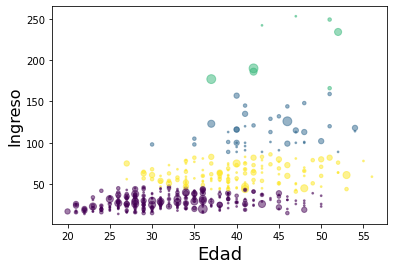

In [8]:
#define el size del grafico que sera por el nivel de educacion

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Ingreso', fontsize=16)

plt.show()

C:\Users\vane_\AppData\Local\Temp/ipykernel_10976/1679055716.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=114)


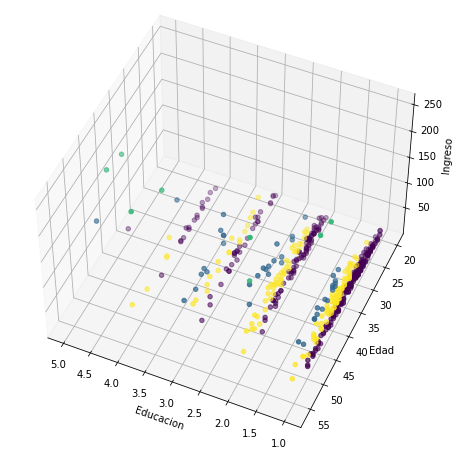

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=114)

plt.cla()
ax.set_xlabel('Educacion')
ax.set_ylabel('Edad')
ax.set_zlabel('Ingreso')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


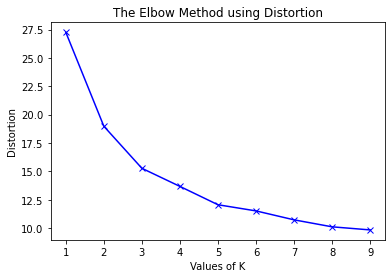

In [10]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 


for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

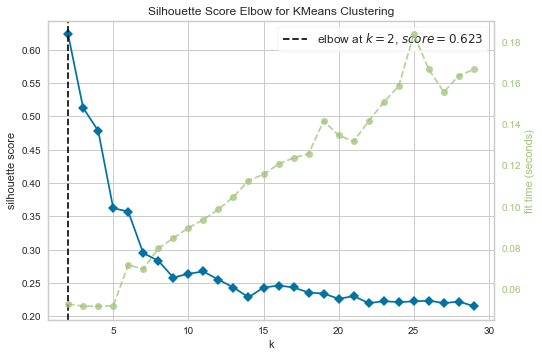

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:

# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
#mientras mas cercano a 1 esta mejor clusterizado
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  


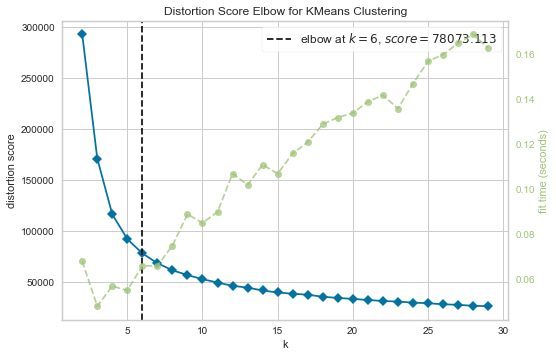

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:

# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
#el numero de cluster a escoger 
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Window

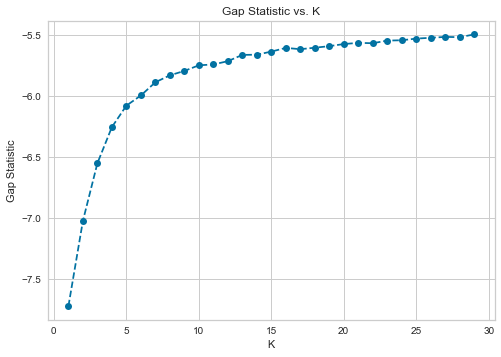

In [13]:

# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
#cacula la distancia, el que mas me alejo
score_g, df = optimalK(X, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

### PAM

In [14]:
Clusm_dataSet = StandardScaler().fit(X)
x_scaled = Clusm_dataSet.transform(X)
kMedoids = KMedoids(n_clusters=5, random_state = 0)
kMedoids.fit(x_scaled)
y_meds = kMedoids.fit_predict(x_scaled)
print(y_meds)

[0 2 0 2 0 0 2 3 3 0 0 2 2 2 3 0 4 0 2 4 3 2 2 2 2 1 3 4 2 0 4 3 2 4 2 2 0
 4 4 4 0 0 4 3 4 3 0 2 4 2 2 0 0 0 3 0 4 2 3 1 0 4 1 4 0 1 2 3 1 1 0 0 4 0
 0 1 3 3 4 1 0 4 1 3 1 1 4 1 0 0 3 4 4 2 2 0 4 1 0 0 3 3 2 2 1 0 3 4 3 2 0
 3 2 3 4 2 0 1 2 0 2 3 0 2 4 4 4 3 3 2 0 1 3 3 2 3 2 3 4 2 2 3 2 0 1 3 3 3
 2 1 4 1 3 1 2 4 1 3 2 2 2 3 3 3 0 4 1 4 1 2 2 1 0 2 3 3 0 1 3 2 2 0 1 3 4
 2 3 0 1 0 3 0 0 4 0 2 4 2 4 0 3 2 2 2 3 2 0 1 0 3 3 0 3 3 3 3 1 1 2 3 0 1
 4 2 2 4 1 2 4 4 3 3 0 3 2 4 2 1 3 3 4 3 1 2 3 1 3 1 4 2 4 4 2 4 2 4 0 2 3
 1 3 2 1 0 0 3 2 4 3 0 3 2 0 4 3 3 1 3 2 1 4 2 0 1 4 3 0 0 3 4 2 4 2 3 2 3
 4 4 1 3 0 2 2 1 2 4 3 1 1 0 4 1 2 0 2 1 0 1 2 3 3 3 0 2 4 3 4 0 1 2 1 2 3
 3 4 1 4 3 2 3 4 4 4 1 1 3 3 2 3 3 2 3 0 4 3 4 1 2 1 0 3 0 2 3 2 3 2 3 3 2
 3 3 1 2 4 2 3 0 2 2 2 3 4 1 2 2 0 1 0 2 4 3 4 3 3 2 3 2 0 1 2 3 4 4 2 3 1
 0 2 0 3 1 0 2 4 2 4 1 0 0 4 1 2 2 0 2 2 0 3 2 3 1 4 4 2 3 1 2 4 0 3 3 0 1
 0 0 3 0 3 4 3 4 4 1 3 0 3 2 2 1 0 1 0 4 3 1 3 2 1 2 2 0 3 3 4 2 0 0 4 3 0
 2 0 0 3 3 2 4 4 3 0 2 3 

In [16]:

df["Clus_kmedoids"] = y_meds
df.head(5)

ValueError: Length of values (517) does not match length of index (29)

In [ ]:
df.groupby('Clus_kmedoids').mean()

In [ ]:
#define el size del grafico que sera por el nivel de educacion

area2 = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area2, c=y_meds.astype(np.float), alpha=0.5)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Ingreso', fontsize=16)

plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Clus_dataSet, method='ward'))


In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Clus_dataSet, method='ward'))
plt.axhline(y=36, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(Clus_dataSet)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(Clus_dataSet['Edad'], Clus_dataSet['Ingreso'], c=cluster.labels_) 